<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210716%5D_CNN_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference:  [深度學習筆記(8)：Autoencoder自編碼器(AE)](https://yanwei-liu.medium.com/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-8-autoencoder%E8%87%AA%E7%B7%A8%E7%A2%BC%E5%99%A8-ae-97eff2b4280a)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output 

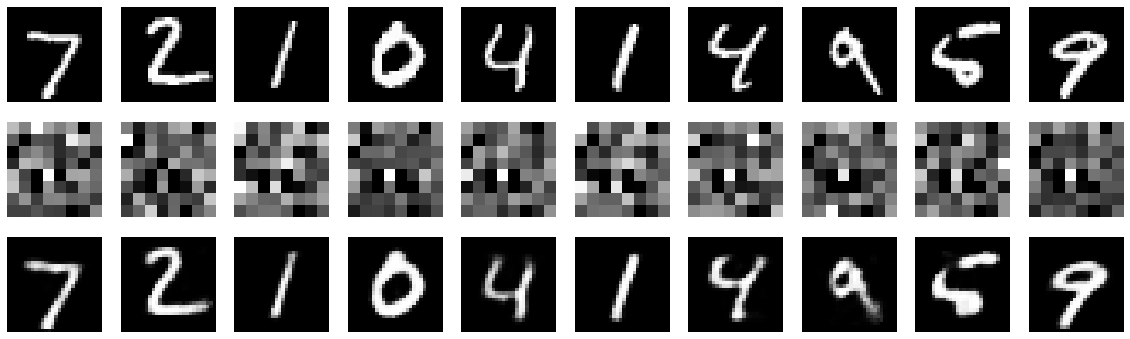

In [19]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, _), (X_test, _) = mnist.load_data()

# 轉換成 28*28 = 784 的向量
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255

# 定義 autoencoder 模型
input_img = Input(shape=(784,))
x = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(encoded)
decoded = Dense(784, activation="sigmoid")(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()  # 顯示模型摘要資訊

# 定義 encoder 模型
encoder = Model(input_img, encoded)
encoder.summary()    # 顯示模型摘要資訊
# 定義 decoder 模型
decoder_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-2](decoder_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()    # 顯示模型摘要資訊


# 編譯模型
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
# 訓練模型
autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=10, batch_size=256, shuffle=True, verbose=2)

# 壓縮圖片
encoded_imgs = encoder.predict(X_test)
# 解壓縮圖片
decoded_imgs = decoder.predict(encoded_imgs)
# 顯示原始, 壓縮和還原圖片
import matplotlib.pyplot as plt
n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 6))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(8, 8), cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()